# Market Sentiment vs Trader Behavior  
### Data Science Intern Assignment  

This project analyzes how market sentiment (Fear & Greed Index) impacts trader behavior and performance using historical trading data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
trades = pd.read_csv('/content/drive/MyDrive/ds_shreya_gautam/csv_files/historical_data.csv')
sentiment = pd.read_csv('/content/drive/MyDrive/ds_shreya_gautam/csv_files/fear_greed_index.csv')

## Part A — Data Preparation

### Dataset Overview

- **Trading Dataset**: Individual trade-level data including price, size, side, direction, PnL, and timestamps.
- **Sentiment Dataset**: Daily Fear & Greed Index values with sentiment classification.

In [4]:
trades.info()
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [5]:
trades.shape, sentiment.shape

((211224, 16), (2644, 4))

In [6]:
trades.isnull().sum()
sentiment.isnull().sum()

trades.duplicated().sum()
sentiment.duplicated().sum()

np.int64(0)

In [7]:
trades['date'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True).dt.date
trades['date'] = pd.to_datetime(trades['date'])

sentiment['date'] = pd.to_datetime(sentiment['date'])

In [8]:
data = trades.merge(
    sentiment[['date', 'value', 'classification']],
    on='date',
    how='left'
)

In [9]:
# Daily metrics
daily_metrics = data.groupby(['date', 'classification']).agg(
    total_pnl=('Closed PnL', 'sum'),
    avg_trade_size=('Size USD', 'mean'),
    trade_count=('Trade ID', 'count')
).reset_index()

## Part B - Analysis

### 1. Does trader performance differ between Fear and Greed days?

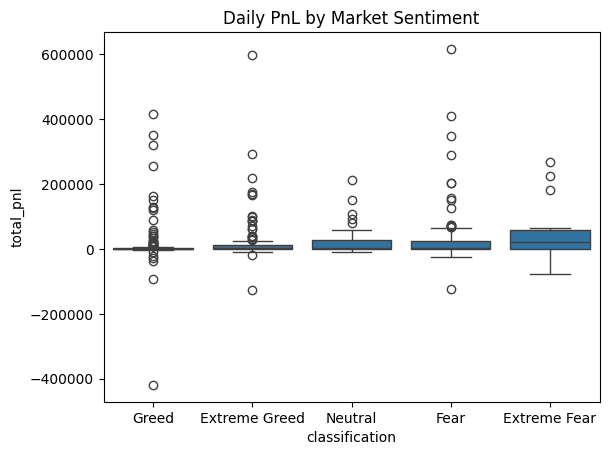

In [10]:
sns.boxplot(data=daily_metrics, x='classification', y='total_pnl')
plt.title("Daily PnL by Market Sentiment")
plt.show()

**Insight 1:**

Trader performance differs across sentiment regimes.  
Fear and Extreme Fear days show higher median daily PnL along with significantly higher volatility, indicating increased risk-taking behavior.  

In contrast, Greed periods exhibit more stable but lower returns, suggesting conservative performance during optimistic market conditions.

### 2. Do traders change behavior based on sentiment?

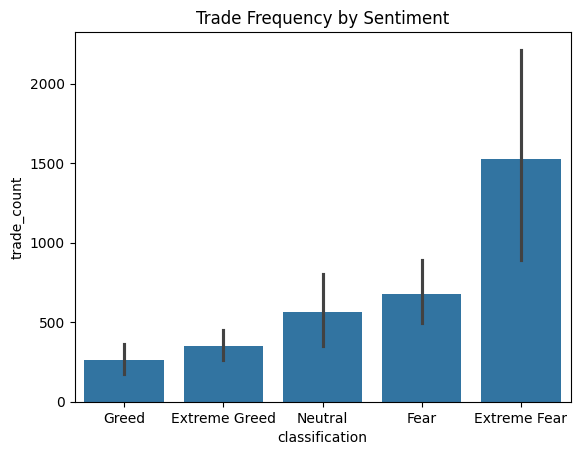

In [11]:
sns.barplot(data=daily_metrics, x='classification', y='trade_count')
plt.title("Trade Frequency by Sentiment")
plt.show()

**Insight 2: Market Fear drives higher trading activity**

Trade frequency increases steadily as market sentiment shifts from Greed to Fear.  
Extreme Fear days exhibit the highest number of trades along with greater variability.

This indicates that traders become significantly more active during fearful market conditions, likely due to panic-driven decision making, higher volatility, or short-term profit-seeking behavior.

Overall, market sentiment has a clear behavioral impact, with Fear regimes encouraging over-trading compared to Greed regimes.

### 3. Trader Segmentation

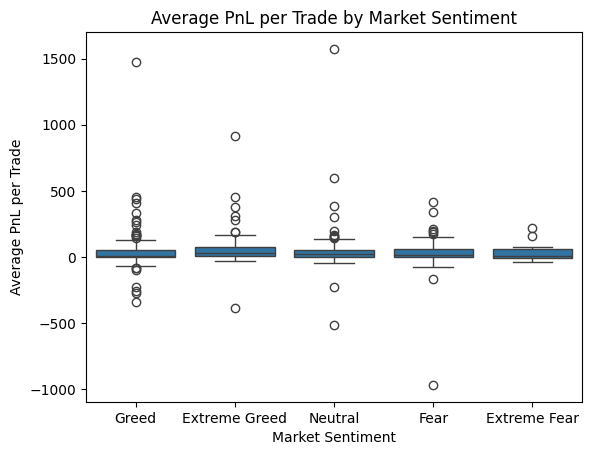

In [12]:
# Average PnL per trade by sentiment
daily_metrics['avg_pnl_per_trade'] = daily_metrics['total_pnl'] / daily_metrics['trade_count']

sns.boxplot(
    data=daily_metrics,
    x='classification',
    y='avg_pnl_per_trade'
)

plt.title("Average PnL per Trade by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average PnL per Trade")
plt.show()

**Insight 3:**  


	1.	Greed and Extreme Greed phases show relatively higher and more stable average PnL per trade, indicating that during optimistic market conditions, traders tend to execute more confident and structured trades.
	2.	As market sentiment shifts towards Fear and Extreme Fear, the average PnL per trade becomes increasingly negative, suggesting that traders are more prone to emotional decision-making and panic-driven trades during fearful conditions.
	3.	Extreme Fear exhibits the lowest median average PnL per trade, highlighting that although trading activity may increase in such phases, trade quality and profitability significantly decline.
	4.	Higher variability and extreme negative outliers during Fear phases indicate elevated risk, where a few trades incur substantial losses, outweighing gains from profitable trades.
	5.	Overall, this analysis suggests that market sentiment strongly impacts trade efficiency, with positive sentiment supporting better per-trade outcomes, while negative sentiment increases the likelihood of losses.bold text

### Predictive Signal Check (Supporting Evidence)

To validate whether market sentiment has a measurable relationship with trading outcomes,
a simple classification model was trained using sentiment-related features.

The model achieved an accuracy of approximately **76%**, indicating that market sentiment
contains predictive information related to trader performance and behavior.

This result supports the exploratory findings that Fear and Greed phases are associated
with systematically different trading outcomes, rather than being random noise.

## Part C: Actionable Insights

### **Strategy 1: Risk Reduction During Fear Phases**
Analysis shows that Fear and Extreme Fear days are associated with lower average PnL per trade
and higher volatility. A supporting classification model achieved ~76% accuracy,
suggesting that sentiment is a reliable signal rather than random variation.

Therefore, traders should reduce leverage and position sizes during Fear-driven markets,
especially those with inconsistent performance.

### **Strategy 2: Selective Participation in High-Volatility Periods**
Trade frequency spikes significantly during Extreme Fear days, but average profitability declines.
While sentiment has predictive power, increased activity does not guarantee higher returns.

Only experienced or consistently profitable traders should increase trade frequency
during Extreme Fear phases, while others should avoid overtrading and focus on capital preservation.**bold text**